# Heart Prediction Model Comparison<br>
Created by : 

* <a href="https://github.com/JunaJun-a">Juna</a>
* <a href="https://github.com/sitorus2">Khevin</a>

<br>
Dataset <a href="https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset">link</a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold

import warnings
warnings.filterwarnings("ignore")

from sqlalchemy import Table, Column, Float, Integer, BigInteger

In [3]:
df=pd.read_csv('GC/ADIno_deep/heart-attack-analysis-prediction-dataset/heart.csv')

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
cat_features = ['sex','cp','fbs','restecg', 'exng', 'slp', 'caa','thall']
cont_features = ['age','trtbps','chol','thalachh']

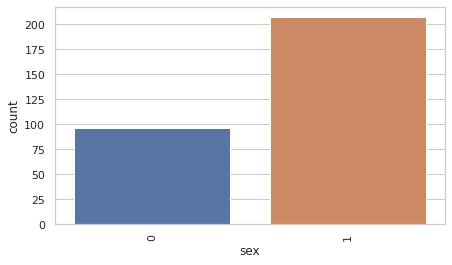

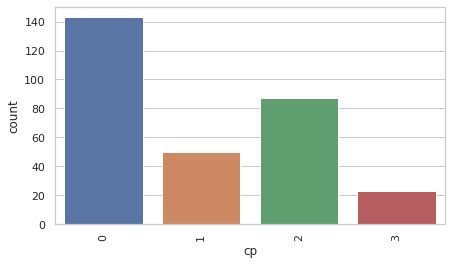

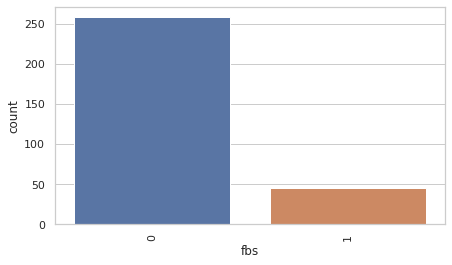

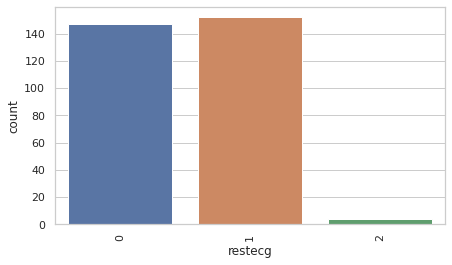

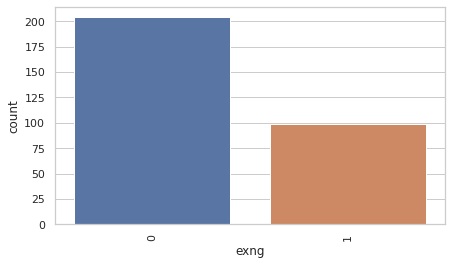

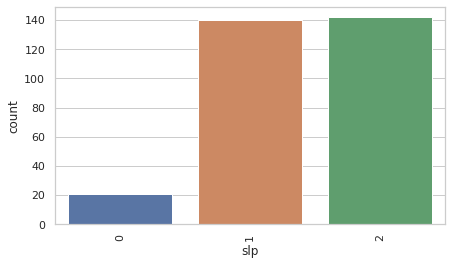

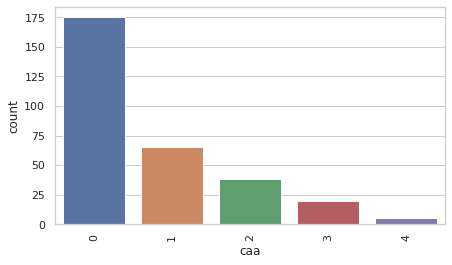

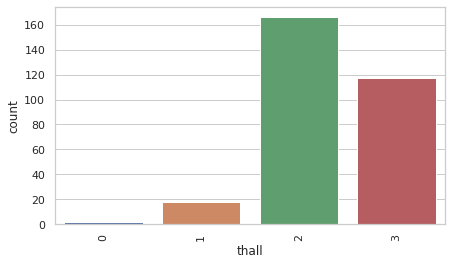

In [8]:
for feature in cat_features:
    plt.figure(figsize=(7,4))
    sns.set_theme(style="whitegrid")
    ax = sns.countplot(df[feature])
    plt.xticks(rotation=90)
    plt.show()

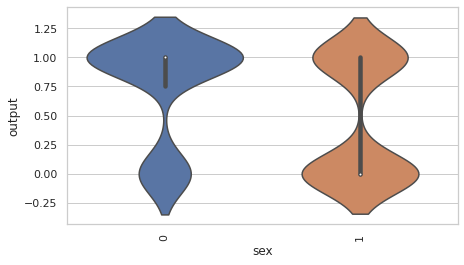

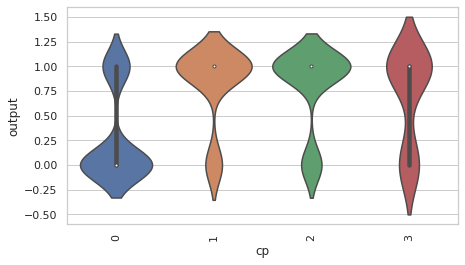

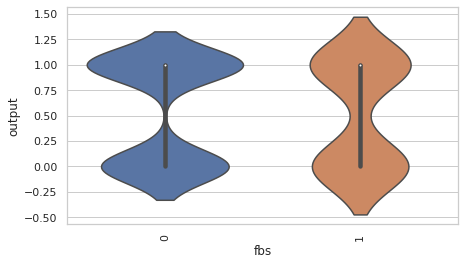

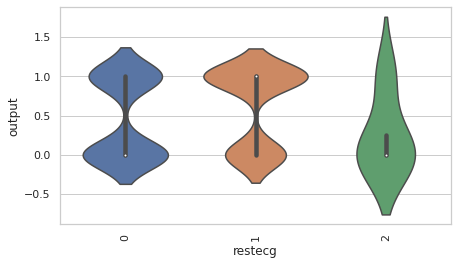

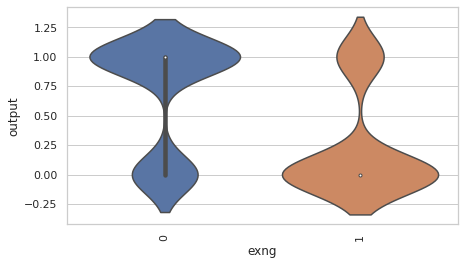

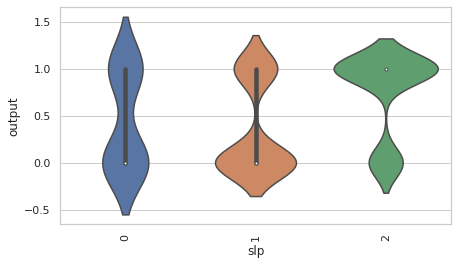

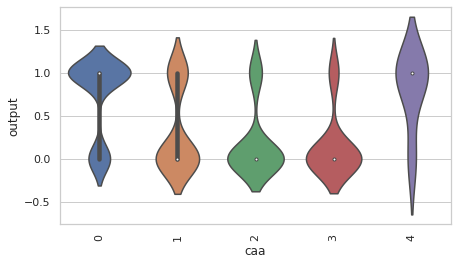

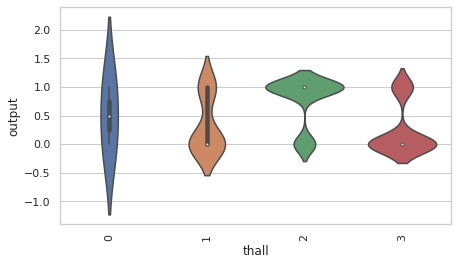

In [9]:
# Check using violinplot!
for feature in cat_features:
    plt.figure(figsize=(7,4))
    sns.set_theme(style="whitegrid")
    ax = sns.violinplot(x=feature,y='output',data=df)
    plt.xticks(rotation=90)
    plt.show()

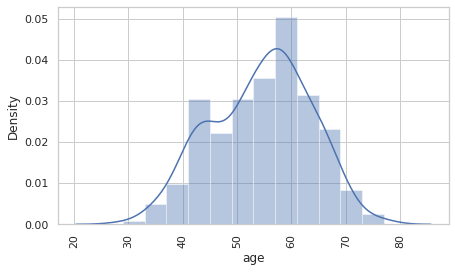

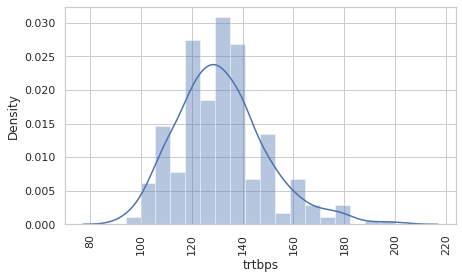

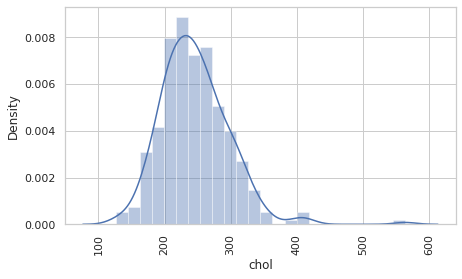

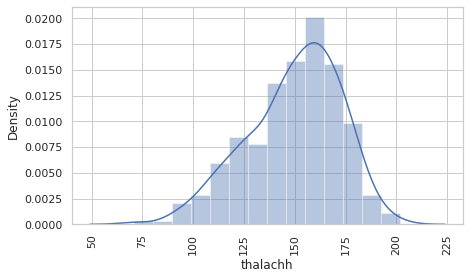

In [10]:
# Distplot
for feature in cont_features:
    plt.figure(figsize=(7,4))
    sns.set_theme(style="whitegrid")
    ax = sns.distplot(df[feature])
    plt.xticks(rotation=90)
    plt.show()

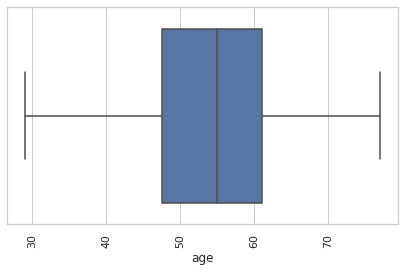

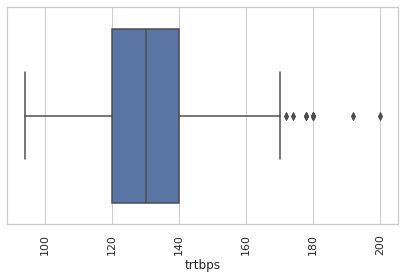

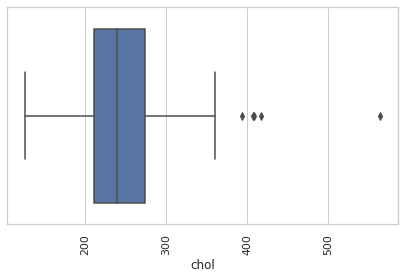

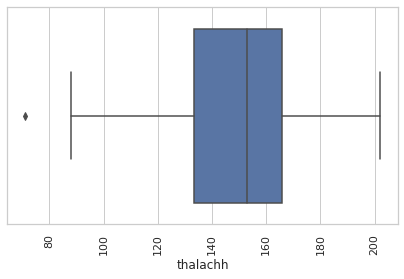

In [11]:
# Boxplot!
for feature in cont_features:
    plt.figure(figsize=(7,4))
    sns.set_theme(style="whitegrid")
    ax = sns.boxplot(df[feature])
    plt.xticks(rotation=90)
    plt.show()

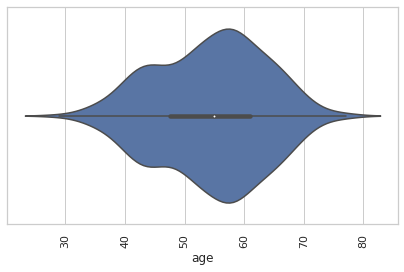

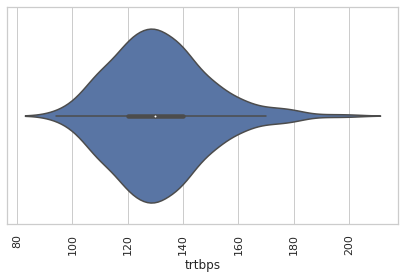

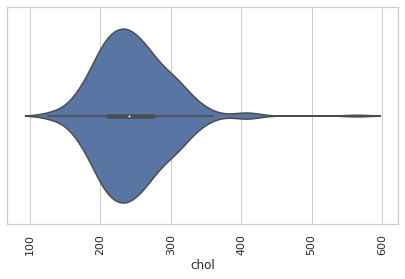

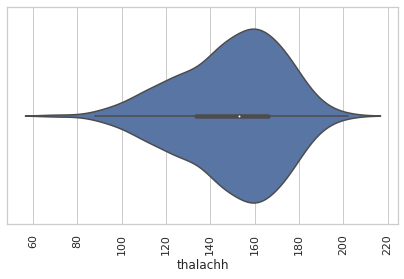

In [12]:
for feature in cont_features:
    plt.figure(figsize=(7,4))
    sns.set_theme(style="whitegrid")
    ax = sns.violinplot(feature,hue='output',data=df)
    plt.xticks(rotation=90)
    plt.show()

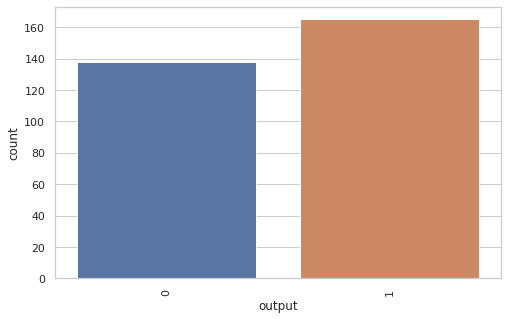

In [16]:
# Check the dependent variable using count plot
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='output', data=df)
plt.xticks(rotation=90)
plt.show()

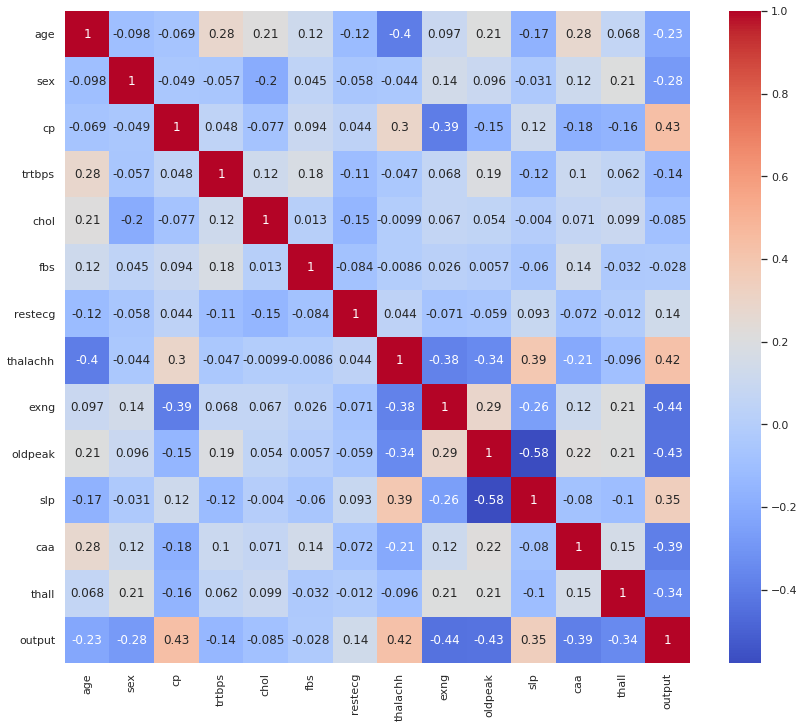

In [17]:
# With the help of corelation matrix we see that how the features are related to each other
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [20]:
y = df['output']
X = df.drop('output', axis=1)

In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, test_size=0.2)

In [23]:
# Standarize
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)

In [25]:
# Use the PCA
pc = PCA(n_components=len(X.columns))
X_train_pc=pc.fit_transform(X_train_sc)
PC_df_train=pd.DataFrame(X_train_pc,columns=['PC_' +str(i) for i in range(1,pc.n_components_+1)])

In [26]:
PC_df_train

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13
0,0.534592,1.292440,-1.226177,1.595222,0.733677,0.263681,-1.581171,-0.277824,-1.007107,-1.205663,0.269856,-0.130870,-0.329351
1,-1.937894,-1.193657,-0.198129,-1.287730,0.126354,1.011945,-0.915278,-0.563277,0.852074,-0.105422,-0.545219,0.225360,-0.141479
2,2.069825,1.818310,1.609428,-0.440846,0.937890,-0.441149,2.852977,-1.263357,0.995575,-0.773034,0.331601,0.993346,0.681295
3,-1.286428,0.940146,-0.050671,-0.086243,1.435308,-1.317269,-0.026002,-1.394505,1.203664,-0.090407,0.686906,0.976802,0.246218
4,0.288921,-0.599876,0.853489,0.352164,-1.024616,-0.205447,-1.859540,0.481358,-0.087035,-0.981784,0.046678,0.915086,-0.476234
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1.611955,1.144282,-0.118558,-0.297967,-0.837479,-0.955661,-0.551777,-1.142490,1.602053,-1.093026,-0.288626,0.205673,-0.448389
238,-2.135667,1.140580,-1.170439,-0.255432,-0.183336,0.202119,-0.878891,0.438163,-0.208325,-0.968565,0.697744,0.297955,-0.390514
239,0.900530,1.591464,-1.873057,-1.036065,1.385857,0.188568,-0.632473,-0.237998,-1.226474,-0.155328,1.446045,0.459668,-0.217211
240,-0.317825,1.536287,0.157258,-0.459979,0.237746,-0.032097,-0.845569,-1.474567,-1.521602,1.072110,-0.778743,0.118419,0.081585


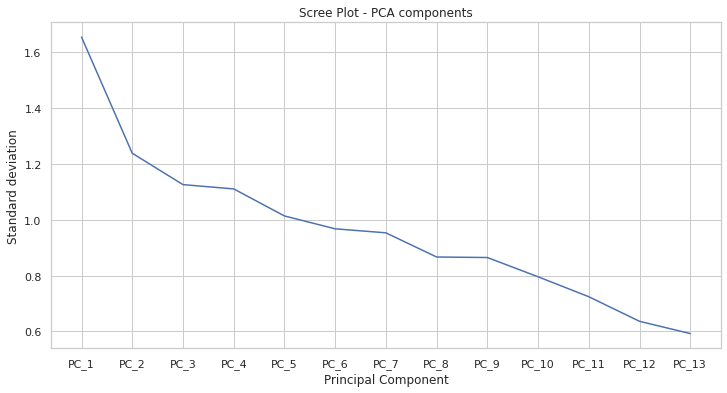

In [27]:
# Scree plot!
plt.figure(figsize=(12,6))
plt.plot(PC_df_train.std())
plt.title('Scree Plot - PCA components')
plt.xlabel('Principal Component')
plt.ylabel('Standard deviation')
plt.show()

In [31]:
# Now use the Logistic Regression!
classifier = LogisticRegression()
classifier.fit(pc.fit_transform(X_train_sc),y_train)
X_test_sc = sc.transform(X_test)
X_test_pc = pc.transform(X_test_sc)
y_lr=classifier.predict(X_test_pc)

In [32]:
print('Confusion Matrix \n',confusion_matrix(y_lr,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_lr,y_test))
print()
print('Classification Report \n',classification_report(y_lr,y_test))

Confusion Matrix 
 [[22  2]
 [ 7 30]]

Accuracy Score 
 0.8524590163934426

Classification Report 
               precision    recall  f1-score   support

           0       0.76      0.92      0.83        24
           1       0.94      0.81      0.87        37

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



In [33]:
# Now try use SVC!
classifier = SVC()
classifier.fit(pc.fit_transform(X_train_sc),y_train)
X_test_sc = sc.transform(X_test)
X_test_pc = pc.transform(X_test_sc)
y_svc=classifier.predict(X_test_pc)

In [34]:
print('Confusion Matrix \n',confusion_matrix(y_svc,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_svc,y_test))
print()
print('Classification Report \n',classification_report(y_svc,y_test))

Confusion Matrix 
 [[22  3]
 [ 7 29]]

Accuracy Score 
 0.8360655737704918

Classification Report 
               precision    recall  f1-score   support

           0       0.76      0.88      0.81        25
           1       0.91      0.81      0.85        36

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.85      0.84      0.84        61



In [35]:
# Try use RandomForest
classifier = RandomForestClassifier()
classifier.fit(pc.fit_transform(X_train_sc),y_train)
X_test_sc = sc.transform(X_test)
X_test_pc = pc.transform(X_test_sc)
y_rfc=classifier.predict(X_test_pc)

In [36]:
print('Confusion Matrix \n',confusion_matrix(y_rfc,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_rfc,y_test))
print()
print('Classification Report \n',classification_report(y_rfc,y_test))

Confusion Matrix 
 [[21  2]
 [ 8 30]]

Accuracy Score 
 0.8360655737704918

Classification Report 
               precision    recall  f1-score   support

           0       0.72      0.91      0.81        23
           1       0.94      0.79      0.86        38

    accuracy                           0.84        61
   macro avg       0.83      0.85      0.83        61
weighted avg       0.86      0.84      0.84        61



In [37]:
# GBoost!
classifier = GradientBoostingClassifier()
classifier.fit(pc.fit_transform(X_train_sc),y_train)
X_test_sc = sc.transform(X_test)
X_test_pc = pc.transform(X_test_sc)
y_gbc=classifier.predict(X_test_pc)

In [38]:
print('Confusion Matrix \n',confusion_matrix(y_gbc,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_gbc,y_test))
print()
print('Classification Report \n',classification_report(y_gbc,y_test))

Confusion Matrix 
 [[19  1]
 [10 31]]

Accuracy Score 
 0.819672131147541

Classification Report 
               precision    recall  f1-score   support

           0       0.66      0.95      0.78        20
           1       0.97      0.76      0.85        41

    accuracy                           0.82        61
   macro avg       0.81      0.85      0.81        61
weighted avg       0.87      0.82      0.83        61



In [39]:
# Now back to the Random Forest!
classifier = RandomForestClassifier(n_estimators=100,
                                    min_samples_split=5,
                                    min_samples_leaf=1,
                                    max_depth=5)
classifier.fit(X_train_sc,y_train)
X_test_sc = sc.transform(X_test)
y_rfc=classifier.predict(X_test_sc)

In [41]:
print('Confusion Matrix \n',confusion_matrix(y_rfc,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_rfc,y_test))
print()
print('Classification Report \n',classification_report(y_rfc,y_test))

Confusion Matrix 
 [[23  2]
 [ 6 30]]

Accuracy Score 
 0.8688524590163934

Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        25
           1       0.94      0.83      0.88        36

    accuracy                           0.87        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.88      0.87      0.87        61



In [46]:
# Naive Bayes
classifier = GaussianNB()
classifier.fit(pc.fit_transform(X_train_sc),y_train)
X_test_sc = sc.transform(X_test)
X_test_pc = pc.transform(X_test_sc)
y_gb=classifier.predict(X_test_pc)

In [47]:
print('Confusion Matrix \n',confusion_matrix(y_gb,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_gb,y_test))
print()
print('Classification Report \n',classification_report(y_gb,y_test))

Confusion Matrix 
 [[24  1]
 [ 5 31]]

Accuracy Score 
 0.9016393442622951

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89        25
           1       0.97      0.86      0.91        36

    accuracy                           0.90        61
   macro avg       0.90      0.91      0.90        61
weighted avg       0.91      0.90      0.90        61



In [51]:
# XGBoost Classifier
Xgboost=XGBClassifier(random_state=28)
params = {'n_estimators': (100,300),
                  'learning_rate': (0.01, 0.6),
                  'subsample': (0.3, 0.9),
                  'max_depth': (2,5),
                  'colsample_bytree': (0.5, 0.9),
                  'min_child_weight': (1,5)
                 }

In [52]:
rf_classifier = RandomForestClassifier(random_state=34)

Param_rf={'max_depth':(2,5),
                         'min_samples_split':(5,10), 
                         'n_estimators':(100,300),
                         'min_samples_leaf':(1,3)

         }

In [56]:
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
search = RandomizedSearchCV(rf_classifier, Param_rf, cv=cv)
search.fit(pc.fit_transform(X_train_sc), y_train)
print(search.best_params_)

{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 2}


In [61]:
classifier = XGBClassifier(subsample= 0.9,
                           n_estimators=300,
                           min_child_weight=5,
                           max_depth=2,
                           learning_rate=0.01,
                           colsample_bytree= 0.9)
classifier.fit(pc.fit_transform(X_train_sc),y_train)
X_test_sc = sc.transform(X_test)
X_test_pc = pc.transform(X_test_sc)
y_xg=classifier.predict(X_test_pc)

[02:10:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [62]:
print('Confusion Matrix \n',confusion_matrix(y_xg,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_xg,y_test))
print()
print('Classification Report \n',classification_report(y_xg,y_test))

Confusion Matrix 
 [[20  1]
 [ 9 31]]

Accuracy Score 
 0.8360655737704918

Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.95      0.80        21
           1       0.97      0.78      0.86        40

    accuracy                           0.84        61
   macro avg       0.83      0.86      0.83        61
weighted avg       0.87      0.84      0.84        61



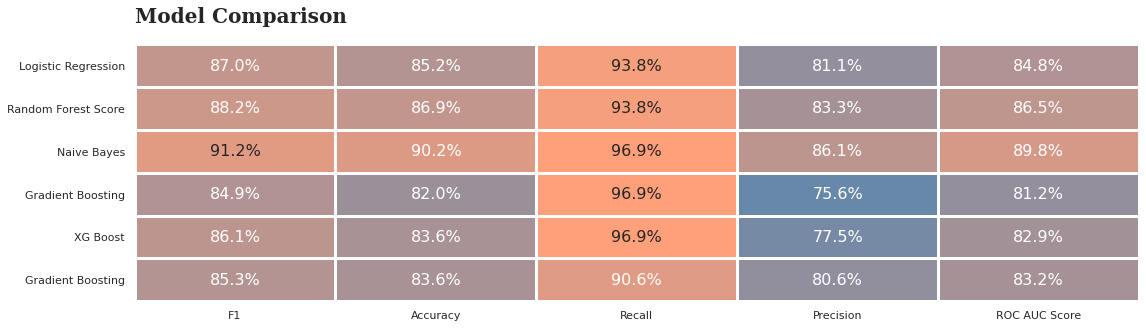

In [65]:
# Now compare all performance!
lr_df = pd.DataFrame(data=[f1_score(y_test,y_lr),accuracy_score(y_test, y_lr), recall_score(y_test, y_lr), precision_score(y_test, y_lr), roc_auc_score(y_test, y_lr)], 
             columns=['Logistic Regression'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
rf_df = pd.DataFrame(data=[f1_score(y_test,y_rfc),accuracy_score(y_test, y_rfc), recall_score(y_test, y_rfc),precision_score(y_test, y_rfc), roc_auc_score(y_test, y_rfc)], 
             columns=['Random Forest Score'],index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
nb_df = pd.DataFrame(data=[f1_score(y_test,y_gb),accuracy_score(y_test, y_gb), recall_score(y_test, y_gb), precision_score(y_test, y_gb), roc_auc_score(y_test, y_gb)], 
             columns=['Naive Bayes'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

xg_df = pd.DataFrame(data=[f1_score(y_test,y_xg),accuracy_score(y_test, y_xg), recall_score(y_test, y_xg), precision_score(y_test, y_xg), roc_auc_score(y_test, y_xg)], 
             columns=['XG Boost'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
gbc_df = pd.DataFrame(data=[f1_score(y_test,y_gbc),accuracy_score(y_test, y_gbc), recall_score(y_test, y_gbc), precision_score(y_test, y_gbc), roc_auc_score(y_test,y_gbc)], 
             columns=['Gradient Boosting'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
svc_df = pd.DataFrame(data=[f1_score(y_test,y_svc),accuracy_score(y_test, y_svc), recall_score(y_test, y_svc), precision_score(y_test, y_svc), roc_auc_score(y_test,y_svc)], 
             columns=['Gradient Boosting'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])


df_models = round(pd.concat([lr_df,rf_df,nb_df,gbc_df,xg_df,svc_df], axis=1),3)
colors = ["bisque","ivory","sandybrown","steelblue","lightsalmon"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "white"

fig = plt.figure(figsize=(18,26)) 
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":16})
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 

ax0.text(0,-0.5,'Model Comparison',fontsize=20,fontweight='bold',fontfamily='serif')
plt.show()